In [1]:
%%time
import malaya

CPU times: user 4.27 s, sys: 816 ms, total: 5.09 s
Wall time: 4.19 s


## Explanation

Positive relevancy: The article or piece of text is relevant, tendency is high to become not a fake news. Can be a positive or negative sentiment.

Negative relevancy: The article or piece of text is not relevant, tendency is high to become a fake news. Can be a positive or negative sentiment.

Right now relevancy module only support deep learning model.

In [2]:
negative_text = 'Roti Massimo Mengandungi DNA Babi. Roti produk Massimo keluaran Syarikat The Italian Baker mengandungi DNA babi. Para pengguna dinasihatkan supaya tidak memakan produk massimo. Terdapat pelbagai produk roti keluaran syarikat lain yang boleh dimakan dan halal. Mari kita sebarkan berita ini supaya semua rakyat Malaysia sedar dengan apa yang mereka makna setiap hari. Roti tidak halal ada DNA babi jangan makan ok.'
positive_text = 'Jabatan Kemajuan Islam Malaysia memperjelaskan dakwaan sebuah mesej yang dikitar semula, yang mendakwa kononnya kod E dikaitkan dengan kandungan lemak babi sepertimana yang tular di media sosial. . Tular: November 2017 . Tular: Mei 2014 JAKIM ingin memaklumkan kepada masyarakat berhubung maklumat yang telah disebarkan secara meluas khasnya melalui media sosial berhubung kod E yang dikaitkan mempunyai lemak babi. Untuk makluman, KOD E ialah kod untuk bahan tambah (aditif) dan ianya selalu digunakan pada label makanan di negara Kesatuan Eropah. Menurut JAKIM, tidak semua nombor E yang digunakan untuk membuat sesuatu produk makanan berasaskan dari sumber yang haram. Sehubungan itu, sekiranya sesuatu produk merupakan produk tempatan dan mendapat sijil Pengesahan Halal Malaysia, maka ia boleh digunakan tanpa was-was sekalipun mempunyai kod E-kod. Tetapi sekiranya produk tersebut bukan produk tempatan serta tidak mendapat sijil pengesahan halal Malaysia walaupun menggunakan e-kod yang sama, pengguna dinasihatkan agar berhati-hati dalam memilih produk tersebut.'

## List available Transformer models

In [3]:
malaya.relevancy.available_transformer_model()

{'bert': ['425.6 MB', 'accuracy: 0.872'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.656'],
 'albert': ['48.6 MB', 'accuracy: 0.871'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.843'],
 'xlnet': ['446.5 MB', 'accuracy: 0.885'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.874']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#relevancy

**You might want to use Alxlnet, a very small size, 46.8MB, but the accuracy is still on the top notch.**

## Load ALXLNET model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [4]:
model = malaya.relevancy.transformer(model = 'alxlnet')

#### Predict batch of strings

In [5]:
model.predict_proba([negative_text, positive_text])

[{'not relevant': 0.99813855, 'relevant': 0.0018614056},
 {'not relevant': 9.000895e-06, 'relevant': 0.99999094}]

#### Open relevancy visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(negative_text)

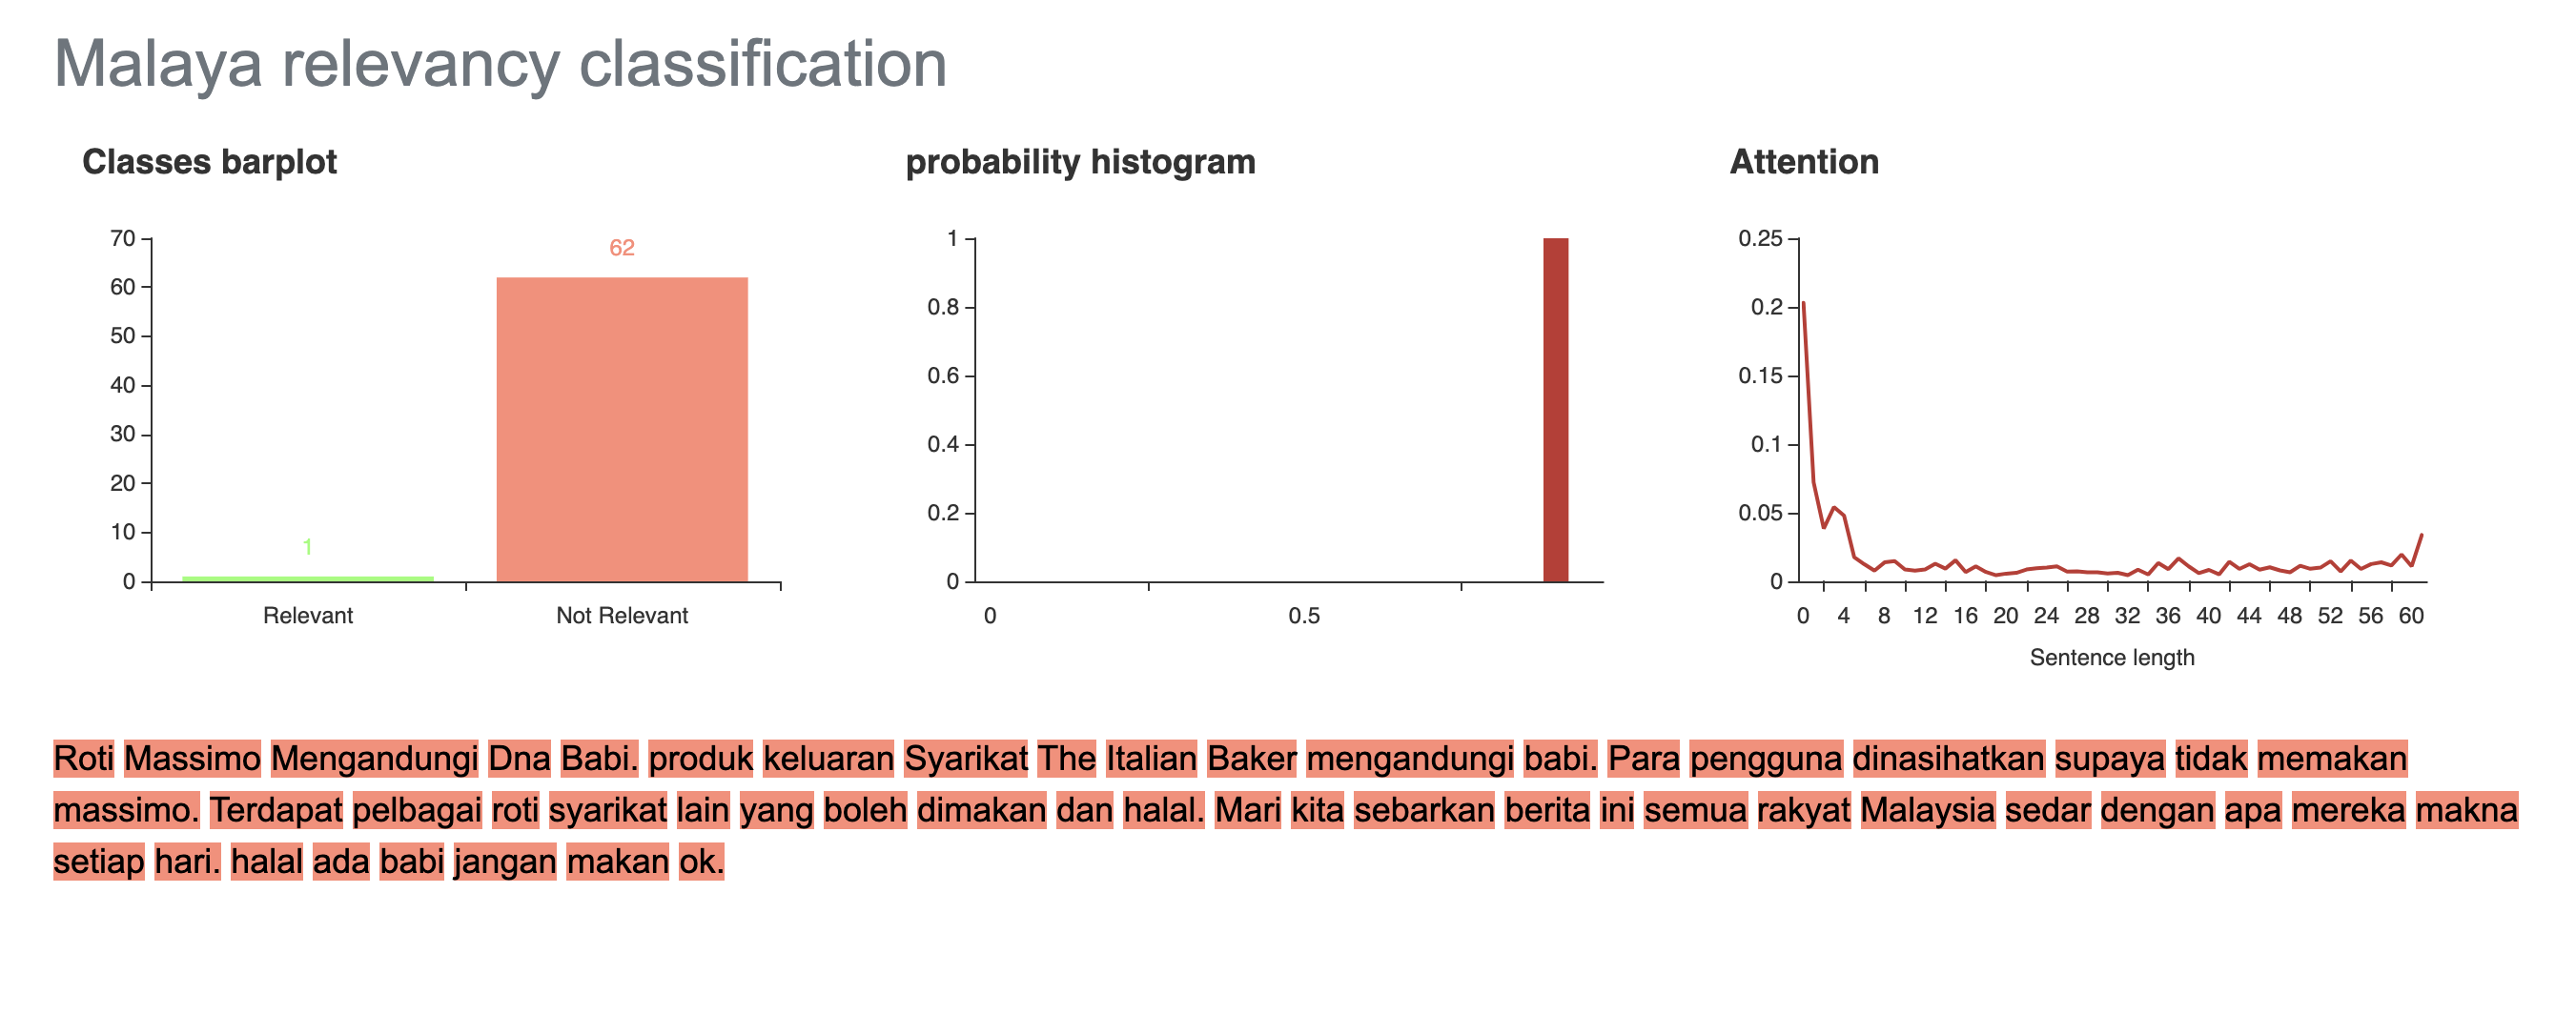

In [9]:
from IPython.core.display import Image, display

display(Image('relevancy-dashboard.png', width=800))

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [11]:
albert = malaya.relevancy.transformer(model = 'albert')

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


In [12]:
malaya.stack.predict_stack([albert, model], [positive_text, negative_text])

[{'not relevant': 4.471244e-05, 'relevant': 0.99976957},
 {'not relevant': 0.9995484, 'relevant': 0.000368167}]